<b>Terceiro Desafio </b>
<p>Consiste em prever o <b>preço do seguro de vida</b> de uma pessoa a partir de um data set onde utilizaremos ensemble models: <b>Random Forest e Gradient Boost</b></p>


In [1]:
#import libriries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importando dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/UNIDADE III/terceiro-desafio-cidamo-2022.zip (Unzipped Files)/train.csv')
df

,age,sex,bmi,children,smoker,region,risc,potential,y
0,56.0,1,34.430,0,0.0,2,1,0.131349,10594.22570
1,18.0,1,33.660,0,0.0,2,0,0.565934,1136.39940
2,54.0,1,21.010,2,0.0,2,1,NaN,11013.71190
3,56.0,0,32.300,3,0.0,0,1,0.373704,13430.26500
4,33.0,1,30.250,0,0.0,2,0,NaN,3704.35450
...,...,...,...,...,...,...,...,...,...
931,56.0,1,19.950,0,1.0,0,1,NaN,22412.64850
932,45.0,0,31.790,0,0.0,2,1,0.655507,17929.30337
933,28.0,1,30.875,0,0.0,1,0,0.459789,3062.50825
934,20.0,0,22.420,0,1.0,1,0,NaN,14711.74380


# **Análise Exploratória e Tratamento dos Dados**

Variáveis
<p>age: Quantitativa discreta</p>
<p>sex: categórica ( 0 ou 1)</p>
<p>bmi:quantitativa contínua</p>
<p>children: quantitativa discreta</p>
<p>smoker: categórica (0 ou 1)</p>
<p>region: categórica ordinal </p>
<p>risc: categórica (0 ou 1)</p>
<p>potential: quantitativa contínua (porcentagem?)</p>
<p>y: Target - quantitativo contínuo


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,risc,potential,y
count,927.000000,936.000000,936.000000,936.000000,920.000000,936.000000,936.000000,438.000000,936.000000
mean,46.048544,0.517094,30.597943,1.101496,0.208696,1.509615,0.502137,0.507874,13158.211579
std,160.699103,0.499975,6.139263,1.218115,0.406597,1.108988,0.500263,0.291749,11917.586152
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000221,1121.873900
25%,26.000000,0.000000,26.196250,0.000000,0.000000,0.750000,0.000000,0.265917,4710.601913
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,1.000000,0.510939,9178.152825
75%,51.000000,1.000000,34.520000,2.000000,0.000000,2.000000,1.000000,0.758098,16818.539955
max,4490.000000,1.000000,53.130000,5.000000,1.000000,3.000000,1.000000,0.995279,63770.428010


## Tratando Outlier

<p>Vemos claramente que há <b>outlier</b> no atributo Age</p>
<p>Vamos explorar isso


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


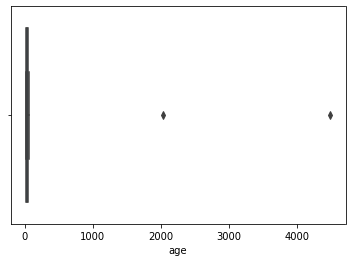

In [3]:
#Boxplot

sns.boxplot(df.age);

In [4]:
#Localizando Outlier in age. 

df.loc[(df.age>130)] #idade maior que 130 anos.

,age,sex,bmi,children,smoker,region,risc,potential,y
465,2030.0,0,23.98,2,NaN,2,0,NaN,8211.1002
609,4490.0,0,40.66,0,0.0,0,0,NaN,9875.6804


In [6]:
#Drop Outlier
df1=df.drop(index=[465,609])
df1.describe()

,age,sex,bmi,children,smoker,region,risc,potential,y
count,925.000000,934.000000,934.000000,934.000000,919.000000,934.000000,934.000000,438.000000,934.000000
mean,39.099459,0.518201,30.594256,1.101713,0.208923,1.510707,0.503212,0.507874,13167.022759
std,14.102855,0.499936,6.133178,1.218532,0.406760,1.108958,0.500258,0.291749,11928.765991
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000221,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,0.000000,0.265917,4695.398638
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,1.000000,0.510939,9178.152825
75%,51.000000,1.000000,34.482500,2.000000,0.000000,2.000000,1.000000,0.758098,16862.795985
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,1.000000,0.995279,63770.428010


## Tratando Missing

In [7]:
df1.isnull().sum()

age            9
sex            0
bmi            0
children       0
smoker        15
region         0
risc           0
potential    496
y              0
dtype: int64

In [14]:
#Correlações com target
df1.dropna().corr().y.sort_values()

risc        -0.031291
region       0.011702
sex          0.045336
children     0.051905
potential    0.054595
age          0.233311
bmi          0.279731
smoker       0.790040
y            1.000000
Name: y, dtype: float64

<p>Vemos que metade dos dados do atributo potential são NAN e potential não tem grande correlação com nosso target</p>
<p>Por isso, vamos retirar essa coluna do modelo

In [15]:
#Retirando feature potential

df2=df1.drop(labels=['potential'], axis=1)
print(df2.shape)
df2.isnull().sum()

(934, 8)


age          9
sex          0
bmi          0
children     0
smoker      15
region       0
risc         0
y            0
dtype: int64

<p>Como os dados faltantes de age são menos de 1% optaremos por remover</p>


In [17]:
#Dados Faltantes Smoker
df2.loc[(df2.smoker.isnull()==True)]

,age,sex,bmi,children,smoker,region,risc,y
57,59.0,0,27.720,3,NaN,2,0,14001.13380
58,41.0,0,36.080,1,NaN,2,0,6781.35420
60,61.0,1,32.300,2,NaN,1,1,14119.62000
69,30.0,0,28.405,1,NaN,1,0,4527.18295
194,37.0,0,23.370,2,NaN,1,0,6686.43130
281,58.0,0,32.395,1,NaN,0,1,13019.16105
301,49.0,0,21.300,1,NaN,3,1,9182.17000
344,36.0,1,28.880,3,NaN,0,0,6748.59120
432,49.0,1,25.840,1,NaN,0,0,9282.48060
516,41.0,1,21.780,1,NaN,2,1,6272.47720


<p>Os faltantes de Smoker vamos considerar zero, ou seja, consideramos não fumantes</p>

In [19]:
#Preenchendo NAN da feature smoker
#excluindo missing da age
df3=df2.fillna(value={'smoker':0}) #substituindo por zero 
df4=df3.dropna()
print(df4.shape)
df4.isnull().sum()

(925, 8)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
risc        0
y           0
dtype: int64

## Exploração dos Dados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


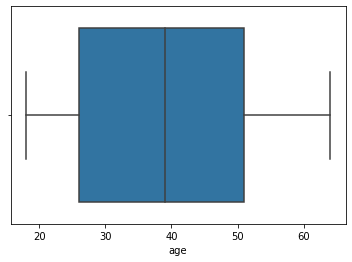

In [20]:
#Plotting 
sns.boxplot(df4.age)

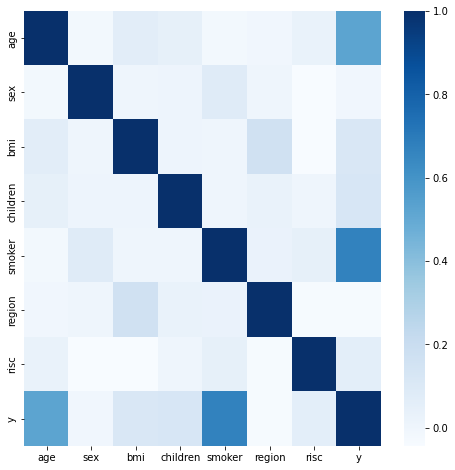

In [22]:
#plotting heatmap 
plt.figure(figsize=(8,8))
sns.heatmap(df4.corr('spearman'), cmap='Blues')

Vemos que há uma boa relação do **target** com *age e smoker*

# **Ajustando para modelagem**
##Normalização

In [24]:
#Normalization z-score
print('MÉDIA\n',df4.mean())
print('\nDESVIO PADRÃO\n',df4.std())
df4.copy()
df4_norm=df4.apply(lambda x: (x-x.mean())/x.std(), axis=0)
df4_norm

MÉDIA
 age            39.099459
sex             0.522162
bmi            30.560584
children        1.097297
smoker          0.207568
region          1.509189
risc            0.505946
y           13203.729377
dtype: float64

DESVIO PADRÃO
 age            14.102855
sex             0.499779
bmi             6.123007
children        1.215539
smoker          0.405785
region          1.111321
risc            0.500235
y           11972.916439
dtype: float64


,age,sex,bmi,children,smoker,region,risc,y
0,1.198377,0.956099,0.631947,-0.902725,-0.511521,0.441646,0.987644,-0.217951
1,-1.496113,0.956099,0.506192,-0.902725,-0.511521,0.441646,-1.011416,-1.007886
2,1.056562,0.956099,-1.559787,0.742636,-0.511521,0.441646,0.987644,-0.182914
3,1.198377,-1.044786,0.284079,1.565316,-0.511521,-1.358014,0.987644,0.018921
4,-0.432498,0.956099,-0.050724,-0.902725,-0.511521,0.441646,-1.011416,-0.793405
...,...,...,...,...,...,...,...,...
931,1.198377,0.956099,-1.732904,-0.902725,1.952839,-1.358014,0.987644,0.769146
932,0.418393,-1.044786,0.200786,-0.902725,-0.511521,0.441646,0.987644,0.394689
933,-0.787036,0.956099,0.051350,-0.902725,-0.511521,-0.458184,-1.011416,-0.847013
934,-1.354297,-1.044786,-1.329508,-0.902725,1.952839,-0.458184,-1.011416,0.125952


## Modelando

### Random Forest Regressor

In [25]:
#separando em treino e teste
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df4_norm.drop('y',axis=1),df4.y, random_state=0, test_size=0.1)

In [26]:
#Import libriries

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Selection parameters
params = {
    'n_estimators': [75, 100, 150,500], #number of trees
    'criterion': ['mse', 'mae'], #criterion decision of steps of trees
    'n_jobs': [-1],
    'max_depth': [3, 5, 8], #depth max 
    
}

#Instantianting Modelo
gs = GridSearchCV(RandomForestRegressor(random_state=0), params, cv = 5, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [3, 5, 8],
                         'n_estimators': [75, 100, 150, 500], 'n_jobs': [-1]},
             verbose=2)

In [27]:
#best estimator
gs.best_estimator_

RandomForestRegressor(criterion='mse', max_depth=5, n_jobs=-1, random_state=0)

In [28]:
#Fit model wtih best estimator
gs.best_estimator_.fit(X_train,y_train)

#Predict train and test 
pred_test = gs.best_estimator_.predict(X_test)
pred_train = gs.best_estimator_.predict(X_train)

#Evaluating model
print('Score no teste: ', r2_score(y_test,pred_test))
print('Score no treino: ', r2_score(y_train,pred_train))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Score no teste:  0.8981642952518605
Score no treino:  0.898498399135976


Não houve Overfitting 

### Gradient Boosting Regressor

In [29]:
#Import Libriries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

#Select Parameters
params = {
    'n_estimators': np.arange(20,400,50),
    'max_depth': np.arange(3,15,2),
    'learning_rate': np.linspace(0.01,1,20)}

#Instantianting Modelo
rs = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 4, verbose=2,n_iter=200, n_jobs=-1)

#Train Model
rs.fit(X_train, y_train)

Fitting 4 folds for each of 200 candidates, totalling 800 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=0),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.06210526, 0.11421053, 0.16631579, 0.21842105,
       0.27052632, 0.32263158, 0.37473684, 0.42684211, 0.47894737,
       0.53105263, 0.58315789, 0.63526316, 0.68736842, 0.73947368,
       0.79157895, 0.84368421, 0.89578947, 0.94789474, 1.        ]),
                                        'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                                        'n_estimators': array([ 20,  70, 120, 170, 220, 270, 320, 370])},
                   verbose=2)

In [32]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.21842105263157896, n_estimators=20,
                          random_state=0)

In [33]:
#Fit Model ith best estimator 
rs.best_estimator_.fit(X_train,y_train)

#Predict test and train
pred_test2 = rs.best_estimator_.predict(X_test)
pred_train2 = rs.best_estimator_.predict(X_train)

#Evaluating model
print('Score no teste: ', r2_score(y_test,pred_test2))
print('Score no treino: ', r2_score(y_train,pred_train2))

Score no teste:  0.9030181821715596
Score no treino:  0.8932264305703144


Vemos que o Modelo RS do gradient boosting foi mais eficiente pelo r2_score

## Modelando com Feature Selection

Agora quero saber quais as features que mais influenciam e repetir o modelo com essas features
<p>Vamos utilizar Random Forest para verificar ordem de importância das features

In [34]:
#import
from sklearn.ensemble import RandomForestRegressor

# #Instantianting and Fitting #Instantianting Model
model= RandomForestRegressor()
model.fit(df4_norm.drop(labels='y',axis=1),df4.y)

RandomForestRegressor()

Mostrando importancia de cada feature no gráfico

Text(0.5, 1.0, 'Importância de cada feature')

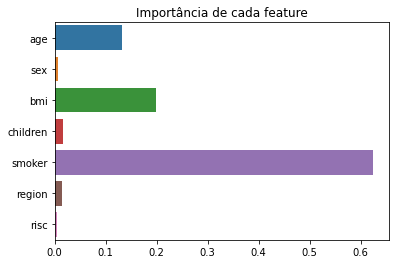

In [35]:
#Plotting
importances = pd.Series(data=model.feature_importances_, index=df4_norm.drop('y',axis=1).columns)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

<p>Vemos que age, bmi e smoker são as principais influenciadoras do modelo</p>
<p>Vamos refazer a modelagem com elas e verificar se melhora o r2 score</p>

In [36]:
df4_select=df4_norm.drop(['sex','children','region','risc'],axis=1)
df4_select.head()

,age,bmi,smoker,y
0,1.198377,0.631947,-0.511521,-0.217951
1,-1.496113,0.506192,-0.511521,-1.007886
2,1.056562,-1.559787,-0.511521,-0.182914
3,1.198377,0.284079,-0.511521,0.018921
4,-0.432498,-0.050724,-0.511521,-0.793405


In [37]:
#separando em treino e teste
from sklearn.model_selection import train_test_split

X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(df4_select.drop('y',axis=1),df4.y, random_state=0, test_size=0.3)

###Random Forest

In [39]:
#GRIND SEARCH RANDOMFOREST REGRESSOR
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [75, 100, 150], #numero de árvores
    'criterion': ['mse', 'mae'], #criterio decisão de prioridade da arvore
    'n_jobs': [-1],
    'max_depth': [3, 5, 8], #profundidade da arvore
    
}

#Instantianting and fitting model
gs_select = GridSearchCV(RandomForestRegressor(random_state=0), params, cv = 5, verbose=0, n_jobs = -1)
gs_select.fit(X_train_s, y_train_s)

#Fitting and Predict model with best estimator
gs_select.best_estimator_.fit(X_train_s,y_train_s)
pred_test_select = gs_select.best_estimator_.predict(X_test_s)
pred_train_select = gs_select.best_estimator_.predict(X_train_s)

#Evaluating model
print('Score no teste: ', r2_score(y_test_s,pred_test_select))
print('Score no treino: ', r2_score(y_train_s,pred_train_select))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Score no teste:  0.8462153221081872
Score no treino:  0.8710245953057832


### Gradient Boosting

In [40]:
#GRADIENTE BOOSTING
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

params = {
    'n_estimators': np.arange(20,400,50),
    'max_depth': np.arange(3,15,2),
    'learning_rate': np.linspace(0.01,1,20),
    
}

#Instantianting and fitting model
rs_select = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 4, verbose=0,n_iter=200, n_jobs=-1)
rs_select.fit(X_train_s, y_train_s)

#Fitting and Predict model with best estimator
rs_select.best_estimator_.fit(X_train_s,y_train_s)
pred_test2_select = rs_select.best_estimator_.predict(X_test_s)
pred_train2_select = rs_select.best_estimator_.predict(X_train_s)

#Evaluating model
from sklearn.metrics import r2_score
print('Score no teste: ', r2_score(y_test_s,pred_test2_select))
print('Score no treino: ', r2_score(y_train_s,pred_train2_select))

Score no teste:  0.8496887234972594
Score no treino:  0.8962543454800997


<b> Vemos que não houve uma melhora </b>em deixar após seleção de features</b>
Portanto <b>seguiremos</b> trabalhando com <b>todos atributos</b>

#**Aplicação do Modelo**

In [47]:
#read data for aplication
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/UNIDADE III/terceiro-desafio-cidamo-2022.zip (Unzipped Files)/test.csv')


## Pré Processamento

In [52]:
#Drop potential
df2_test=df_test.drop(labels=['potential'], axis=1)
print(df2_test.shape)
df2_test.isnull().sum()

(402, 7)


age         2
sex         0
bmi         0
children    0
smoker      4
region      0
risc        0
dtype: int64

In [53]:
#Replace NAN of smoker to zero and Nan of Age to mode

mode_age=df2_test.age.mode()[0] #mode age
df3_test=df2_test.fillna(value={'smoker':0}) #substituindo por zero 
df3_test.age.loc[(df3_test.age.isnull()==True)]=mode_age
df4_test=df3_test.copy()
print(df4_test.shape)
df4_test.isnull().sum()


(402, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
risc        0
dtype: int64

In [54]:
df4_test

,age,sex,bmi,children,smoker,region,risc
0,29.0,0,38.83,3,0.0,2,0
1,28.0,0,33.40,0,0.0,3,1
2,33.0,1,29.40,4,0.0,3,1
3,33.0,1,35.75,1,1.0,2,0
4,51.0,1,35.97,1,0.0,2,0
...,...,...,...,...,...,...,...
397,32.0,0,23.65,1,0.0,2,1
398,58.0,0,33.44,0,0.0,1,0
399,25.0,1,23.90,5,0.0,3,1
400,18.0,0,40.28,0,0.0,0,0


In [55]:
#Normalization
print('MÉDIA\n',df4.drop('y',axis=1).mean())
print('\nDESVIO PADRÃO\n',df4.drop('y',axis=1).std())
df4_test_norm=df4_test.apply(lambda x: (x-df4.drop('y',axis=1).mean())/df4.drop('y',axis=1).std(), axis=1)
df4_test_norm

MÉDIA
 age         39.099459
sex          0.522162
bmi         30.560584
children     1.097297
smoker       0.207568
region       1.509189
risc         0.505946
dtype: float64

DESVIO PADRÃO
 age         14.102855
sex          0.499779
bmi          6.123007
children     1.215539
smoker       0.405785
region       1.111321
risc         0.500235
dtype: float64


,age,sex,bmi,children,smoker,region,risc
0,-0.716129,-1.044786,1.350548,1.565316,-0.511521,0.441646,-1.011416
1,-0.787036,-1.044786,0.463729,-0.902725,-0.511521,1.341476,0.987644
2,-0.432498,0.956099,-0.189545,2.387996,-0.511521,1.341476,0.987644
3,-0.432498,0.956099,0.847527,-0.080045,1.952839,0.441646,-1.011416
4,0.843839,0.956099,0.883458,-0.080045,-0.511521,0.441646,-1.011416
...,...,...,...,...,...,...,...
397,-0.503406,-1.044786,-1.128626,-0.080045,-0.511521,0.441646,0.987644
398,1.340192,-1.044786,0.470262,-0.902725,-0.511521,-0.458184,-1.011416
399,-0.999759,0.956099,-1.087796,3.210676,-0.511521,1.341476,0.987644
400,-1.496113,-1.044786,1.587360,-0.902725,-0.511521,-1.358014,-1.011416


## Grind Search

In [56]:
#Predição com todas as features
pred_test_gs = gs.best_estimator_.predict(df4_test_norm)

In [57]:
#Predição com age, smoker e bmi
df4_test_norm_select=df4_test_norm.drop(['sex','children','region','risc'],axis=1)
pred_test_gs_select=gs_select.best_estimator_.predict(df4_test_norm_select)

## Gradient Boosting

In [58]:
#Predição com todas as features
pred_test_rs = rs.best_estimator_.predict(df4_test_norm)

In [59]:
#Predição com age, smoker e bmi
df4_test_norm_select=df4_test_norm.drop(['sex','children','region','risc'],axis=1)
pred_test2_rs_select = rs_select.best_estimator_.predict(df4_test_norm_select)

# **Carregando e ajustando para submissão no Kaggle**

In [60]:
#read 
df_submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CIDAMO/UNIDADE III/terceiro-desafio-cidamo-2022.zip (Unzipped Files)/sample_submission.csv')
df_submission

,index,y
0,936,13531.688938
1,937,13531.688938
2,938,13531.688938
3,939,13531.688938
4,940,13531.688938
...,...,...
397,1333,13531.688938
398,1334,13531.688938
399,1335,13531.688938
400,1336,13531.688938


In [62]:
#Create DataFrame with all predictions
df_pred=pd.DataFrame(data=[pred_test_gs,pred_test_gs_select,pred_test_rs,pred_test2_rs_select],index=['pred_test_gs','pred_test_gs_select','pred_test_rs','pred_test_rs_select'])
df_pred=df_pred.transpose()

In [63]:
#Joining Dataframe
df_submission.drop('y',axis=1)
df_final=pd.concat([df_submission.drop('y',axis=1),df_pred],axis=1)
df_final #DF with preditions 

,index,pred_test_gs,pred_test_gs_select,pred_test_rs,pred_test_rs_select
0,936,5693.968779,4816.247084,6395.334877,5551.100442
1,937,5607.896520,4816.247084,5056.527791,5478.345470
2,938,6081.396939,5059.435387,6896.670024,5724.763134
3,939,40849.108508,40191.092724,39441.572452,39482.817520
4,940,10455.854778,11066.186325,10832.027829,12205.212103
...,...,...,...,...,...
397,1333,5234.554406,4828.074640,4983.669073,5337.631795
398,1334,12872.939749,13853.055635,12604.680691,12794.934055
399,1335,5349.814974,4587.654794,5180.422235,4614.914788
400,1336,3842.538197,4063.879870,5993.330100,3716.001913


In [70]:
#looping for export csv by prediction 
for column in df_final.drop(labels='index',axis=1).columns:
  df_entrega=df_final[['index',column]]
  df_entrega=df_entrega.rename(columns={df_entrega.columns[1]:'y'})
  df_entrega.to_csv(column,index=False)
